In [1]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [45]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [46]:
series = pd.read_csv('Shampoo_Sales.csv', header=0, parse_dates=True, names=['Month','Sales'],index_col=None)

series.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [47]:
series.dropna(inplace = True)

In [48]:
series.columns

Index(['Month', 'Sales'], dtype='object')

In [49]:
series['Month']=series['Month'].apply(lambda x : parser(x))

In [52]:
series.set_index('Month',inplace=True)

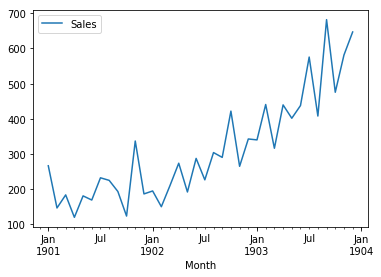

In [53]:
series.plot()
pyplot.show()

From here we can see that Shampoo sales data has a clear trend, that means time series is not stationary and will require differencing to make it stationary.

In [54]:
X = series.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [55]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [56]:
train, test = X[0:size], X[size:len(X)]

In [59]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=272.964489, expected=421.600000
predicted=290.313796, expected=264.500000
predicted=349.117716, expected=342.300000
predicted=306.512991, expected=339.700000
predicted=387.376422, expected=440.400000
predicted=348.154224, expected=315.900000
predicted=386.308838, expected=439.300000
predicted=356.082037, expected=401.300000
predicted=446.379565, expected=437.400000
predicted=394.737330, expected=575.500000
predicted=434.915584, expected=407.600000
predicted=507.923425, expected=682.000000
predicted=435.482971, expected=475.300000
predicted=652.743782, expected=581.300000
predicted=546.343453, expected=646.900000
Test MSE: 7547.806


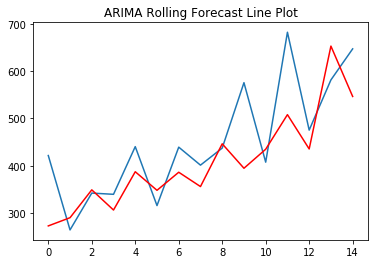

In [62]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.title('ARIMA Rolling Forecast Line Plot')
pyplot.show()